In [ ]:
import re
import json

In [ ]:
import pandas as pd
dff = pd.read_csv('/content/drive/My Drive/readingnew.csv')

In [ ]:
dff['Data'][8]

'LM393 Sensor Data: {"LM393":270}'

In [ ]:
dff

,Timestamp,Data
0,31-10-2024 01:13,"Pollutant Sensor Data: {""T"":26.5,""H"":74.8,""FMH..."
1,31-10-2024 01:13,"LM393 Sensor Data: {""LM393"":649}"
2,31-10-2024 01:13,"MPU Sensor Data: {""Accel"":{""X"":-13732,""Y"":-254..."
3,31-10-2024 01:13,----------------------------------------------...
4,31-10-2024 01:13,"Pollutant Sensor Data: {""T"":26.5,""H"":74.8,""FMH..."
...,...,...
1048570,04-11-2024 10:59,"Pollutant Sensor Data: {""T"":00.0,""H"":00.0,""FMH..."
1048571,04-11-2024 10:59,"LM393 Sensor Data: {""LM393"":199}"
1048572,04-11-2024 10:59,"MPU Sensor Data: {""Accel"":{""X"":10972,""Y"":12504..."
1048573,04-11-2024 10:59,----------------------------------------------...


In [ ]:
# import pandas as pd
# import re
# import json

# # Sample DataFrame creation with 'data' colu

# # Initialize lists to collect data
# pollutant_data = []
# lm393_data = []
# mpu_data = []

# # Regex pattern to remove any non-ASCII or control characters
# non_ascii_control_pattern = re.compile(r'[^\x20-\x7E]+')

# # Process each line in the 'data' column
# for line in dff['Data']:
#     # Remove all non-ASCII and control characters
#     clean_line = re.sub(r'^[^\{]*', '', line).strip()

#     if "Pollutant Sensor Data:" in clean_line:
#         # Extract JSON for Pollutant data
#         json_str = re.search(r"{.*}", clean_line).group()
#         pollutant_data.append(json.loads(json_str))
#     elif "LM393 Sensor Data:" in clean_line:
#         # Extract JSON for LM393 data
#         json_str = re.search(r"{.*}", clean_line).group()
#         lm393_data.append(json.loads(json_str))
#     elif "MPU Sensor Data:" in clean_line:
#         # Extract JSON for MPU data
#         json_str = re.search(r"{.*}", clean_line).group()
#         mpu_data.append(json.loads(json_str))

# # Normalize each sensor data dictionary into a DataFrame
# pollutant_df = pd.json_normalize(pollutant_data)
# lm393_df = pd.json_normalize(lm393_data)
# mpu_accel_df = pd.json_normalize([entry.get("Accel", {}) for entry in mpu_data])
# mpu_gyro_df = pd.json_normalize([entry.get("Gyro", {}) for entry in mpu_data])

# # Prefix columns for MPU data to distinguish Accel and Gyro
# mpu_accel_df = mpu_accel_df.add_prefix("MPU_Accel_")
# mpu_gyro_df = mpu_gyro_df.add_prefix("MPU_Gyro_")

# # Combine all DataFrames into a single DataFrame
# final_df = pd.concat([
#     pollutant_df.add_prefix("Pollutant_"),
#                        lm393_df.add_prefix("LM393_"),
#                        mpu_accel_df,
#                        mpu_gyro_df], axis=1)

# # Reset index for a clean DataFrame
# final_df.reset_index(drop=True, inplace=True)

# print(final_df)


In [ ]:
import pandas as pd
import re
import json

pollutant_data = []
lm393_data = []
mpu_data = []

control_char_pattern = re.compile(r'[\x00-\x1F]+')
leading_zero_pattern = re.compile(r'(?<!\d)0{2}\.0')

for line in dff['Data']:
    clean_line = control_char_pattern.sub('', line).strip()

    try:
        if "Pollutant Sensor Data:" in clean_line:
            clean_line = leading_zero_pattern.sub("0.0", clean_line)
            json_str = re.search(r"{.*}", clean_line).group()
            pollutant_data.append(json.loads(json_str))

        elif "LM393 Sensor Data:" in clean_line:
            json_str = re.search(r"{.*}", clean_line).group()
            lm393_data.append(json.loads(json_str))

        elif "MPU Sensor Data:" in clean_line:
            json_str = re.search(r"{.*}", clean_line).group()
            mpu_data.append(json.loads(json_str))

    except (json.JSONDecodeError, AttributeError) as e:
        print(f"Error parsing line: {clean_line} - {e}")

pollutant_df = pd.json_normalize(pollutant_data)
lm393_df = pd.json_normalize(lm393_data)
mpu_accel_df = pd.json_normalize([entry.get("Accel", {}) for entry in mpu_data])
mpu_gyro_df = pd.json_normalize([entry.get("Gyro", {}) for entry in mpu_data])

pollutant_df = pollutant_df.add_prefix("Pollutant_")
lm393_df = lm393_df.add_prefix("LM393_")
mpu_accel_df = mpu_accel_df.add_prefix("MPU_Accel_")
mpu_gyro_df = mpu_gyro_df.add_prefix("MPU_Gyro_")
final_df = pd.concat([dff['Timestamp'], pollutant_df, lm393_df, mpu_accel_df, mpu_gyro_df], axis=1)

final_df.reset_index(drop=True, inplace=True)
print(final_df)

Error parsing line: yPollutant Sensor Data: {"T":24.5,"H":-yPollutant Sensor Data: {"T":24.7,"H":73.0,"FMHDS":-1,"PMS1":70,"PMS2_5":138,"PMS10":166,"CO2":532} - Expecting value: line 1 column 15 (char 14)
             Timestamp  Pollutant_T  Pollutant_H  Pollutant_FMHDS  \
0     04-11-2024 21:54         24.5         73.5             -1.0   
1     04-11-2024 21:54          0.0          0.0              0.0   
2     04-11-2024 21:54         24.5         73.4             -1.0   
3     04-11-2024 21:54          0.0          0.0              0.0   
4     04-11-2024 21:54         24.5         73.4             -1.0   
...                ...          ...          ...              ...   
1658  04-11-2024 22:04          NaN          NaN              NaN   
1659  04-11-2024 22:04          NaN          NaN              NaN   
1660  04-11-2024 22:04          NaN          NaN              NaN   
1661  04-11-2024 22:04          NaN          NaN              NaN   
1662  04-11-2024 22:04          NaN 

In [ ]:
final_df.to_csv('/content/drive/My Drive/Ubiqitous_readings_processed_abhinav.csv', index=False)

In [ ]:
import pandas as pd
df_final = pd.read_csv('/content/drive/My Drive/Ubiqitous_readings_processed_pradyumn.csv')

<ipython-input-74-f6a1ff75e01c>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv('/content/drive/My Drive/Ubiqitous_readings_processed_pradyumn.csv')


In [ ]:
df_final = df_final.iloc[17000:29034]
df_final = df_final[df_final['Pollutant_T'] != 0]
df_final = df_final.reset_index(drop=True)
df_final

,Timestamp,Pollutant_T,Pollutant_H,Pollutant_FMHDS,Pollutant_PMS1,Pollutant_PMS2_5,Pollutant_PMS10,Pollutant_CO2,LM393_LM393,MPU_Accel_X,MPU_Accel_Y,MPU_Accel_Z,MPU_Gyro_X,MPU_Gyro_Y,MPU_Gyro_Z
0,31-10-2024 03:50,26.5,75.4,-1.0,31.0,53.0,71.0,451.0,293.0,11472.0,12160.0,2268.0,-507.0,-419.0,12.0
1,31-10-2024 03:50,26.5,75.4,-1.0,31.0,53.0,71.0,451.0,303.0,11552.0,12156.0,2272.0,-564.0,-596.0,15.0
2,31-10-2024 03:50,26.5,75.4,-1.0,30.0,51.0,68.0,451.0,194.0,11512.0,12112.0,2320.0,-508.0,-491.0,-42.0
3,31-10-2024 03:50,26.5,75.4,-1.0,29.0,50.0,66.0,451.0,200.0,11276.0,12176.0,2416.0,-630.0,-508.0,-120.0
4,31-10-2024 03:50,26.5,75.4,-1.0,29.0,50.0,67.0,451.0,170.0,11568.0,11992.0,2252.0,-476.0,-554.0,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,31-10-2024 05:41,26.1,76.1,-1.0,45.0,75.0,84.0,637.0,285.0,11332.0,12300.0,2272.0,-536.0,-429.0,41.0
12030,31-10-2024 05:41,26.1,76.2,-1.0,44.0,75.0,85.0,636.0,174.0,11268.0,12200.0,2388.0,-476.0,-7.0,-110.0
12031,31-10-2024 05:41,26.1,76.1,-1.0,43.0,73.0,88.0,636.0,172.0,11336.0,12228.0,2248.0,-550.0,-235.0,60.0
12032,31-10-2024 05:41,26.2,76.1,-1.0,44.0,74.0,87.0,636.0,259.0,11340.0,12348.0,2420.0,-561.0,-340.0,-45.0


In [ ]:
df_final


,Timestamp,Pollutant_T,Pollutant_H,Pollutant_FMHDS,Pollutant_PMS1,Pollutant_PMS2_5,Pollutant_PMS10,Pollutant_CO2,LM393_LM393,MPU_Accel_X,MPU_Accel_Y,MPU_Accel_Z,MPU_Gyro_X,MPU_Gyro_Y,MPU_Gyro_Z
0,31-10-2024 01:13,26.5,74.8,-1.0,26.0,46.0,60.0,722.0,649.0,-13732.0,-2540.0,5996.0,-527.0,-611.0,-120.0
1,31-10-2024 01:13,26.5,74.8,-1.0,26.0,46.0,61.0,723.0,334.0,-13428.0,-2696.0,5784.0,-471.0,-390.0,-20.0
2,31-10-2024 01:13,26.5,74.8,-1.0,26.0,46.0,61.0,723.0,338.0,-13548.0,-2540.0,5848.0,-472.0,-284.0,125.0
3,31-10-2024 01:13,26.5,74.8,-1.0,28.0,49.0,62.0,723.0,212.0,-13464.0,-2816.0,5712.0,-621.0,-597.0,-156.0
4,31-10-2024 01:13,26.5,74.8,-1.0,27.0,49.0,62.0,723.0,157.0,-13556.0,-2748.0,5876.0,-499.0,-491.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,31-10-2024 04:45,26.9,76.5,-1.0,33.0,57.0,74.0,636.0,196.0,11556.0,12260.0,2292.0,-503.0,-320.0,16.0
23002,31-10-2024 04:45,26.9,76.5,-1.0,33.0,57.0,74.0,636.0,282.0,11460.0,12028.0,2128.0,-526.0,-351.0,-63.0
23003,31-10-2024 04:45,26.9,76.5,-1.0,32.0,56.0,72.0,636.0,313.0,11672.0,12280.0,2232.0,-563.0,-323.0,-99.0
23004,31-10-2024 04:45,26.9,76.5,-1.0,32.0,57.0,73.0,636.0,309.0,11260.0,12192.0,2232.0,-592.0,-538.0,-38.0


## Data for 26000 to 32000.


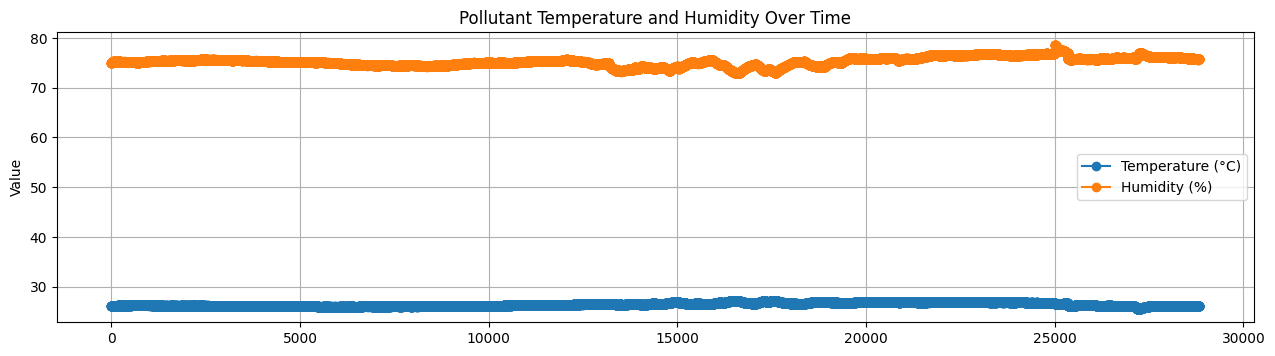

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Figs/Pollutant Temperature and Humidity Over Time.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# # Convert Timestamp to datetime
# df_final['Timestamp'] = pd.to_datetime(df_final['Timestamp'])

# # Set Timestamp as index for plotting
# df_final.set_index('Timestamp', inplace=True)

# Plotting
plt.figure(figsize=(25, 10))

# 1. Line Chart for Pollutant Temperature and Humidity
plt.subplot(3, 2, 1)
plt.plot(df_final.index, df_final['Pollutant_T'], label='Temperature (°C)', marker='o')
plt.plot(df_final.index, df_final['Pollutant_H'], label='Humidity (%)', marker='o')
plt.title('Pollutant Temperature and Humidity Over Time')
# plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/My Drive/Figs/Pollutant Temperature and Humidity Over Time.png')


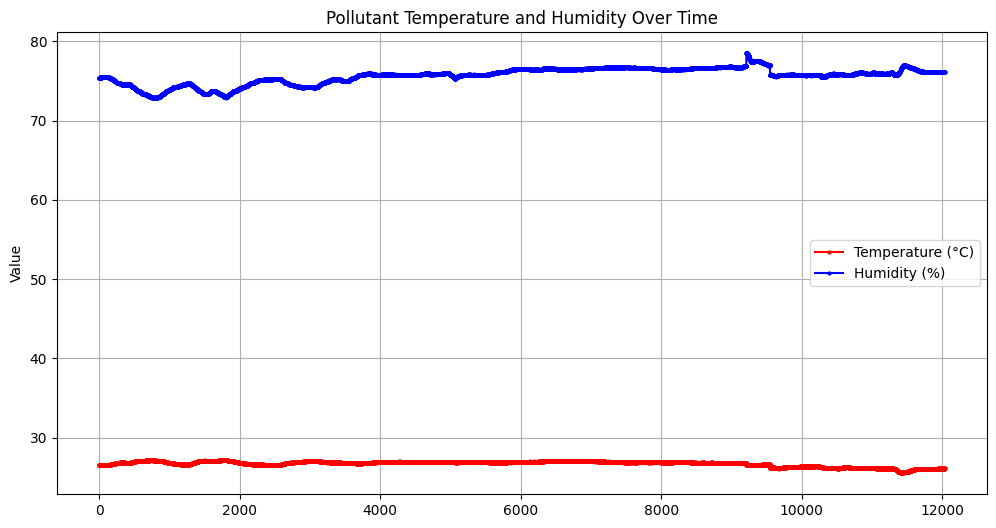

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot Temperature over time
plt.plot(df_final.index, df_final['Pollutant_T'], label='Temperature (°C)', color='red', marker='o',markersize=2)
# Plot Humidity over time
plt.plot(df_final.index, df_final['Pollutant_H'], label='Humidity (%)', color='blue', marker='o',markersize=2)

# Title and labels
plt.title('Pollutant Temperature and Humidity Over Time')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()
plt.savefig('/content/Pollutant Temperature and Humidity Over Time.png')

In [ ]:
# import matplotlib.pyplot as plt

# # Set up the figure for two subplots
# plt.figure(figsize=(14, 10))

# # Plot 1: Pollutant (CO2) and Humidity vs. Time
# plt.subplot(2, 1, 1)
# plt.plot(df_final.index, df_final['Pollutant_CO2'], label='CO2 Level (ppm)', color='green', marker='o')
# plt.plot(df_final.index, df_final['Pollutant_H'], label='Humidity (%)', color='blue', marker='o')
# plt.title('CO2 Level and Humidity Over Time')
# plt.ylabel('Value')
# plt.legend()
# plt.grid()

# # Plot 2: Pollutant (CO2) and Temperature vs. Time
# plt.subplot(2, 1, 2)
# plt.plot(df_final.index, df_final['Pollutant_CO2'], label='CO2 Level (ppm)', color='green', marker='o')
# plt.plot(df_final.index, df_final['Pollutant_T'], label='Temperature (°C)', color='red', marker='o')
# plt.title('CO2 Level and Temperature Over Time')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.grid()

# plt.tight_layout()
# plt.show()


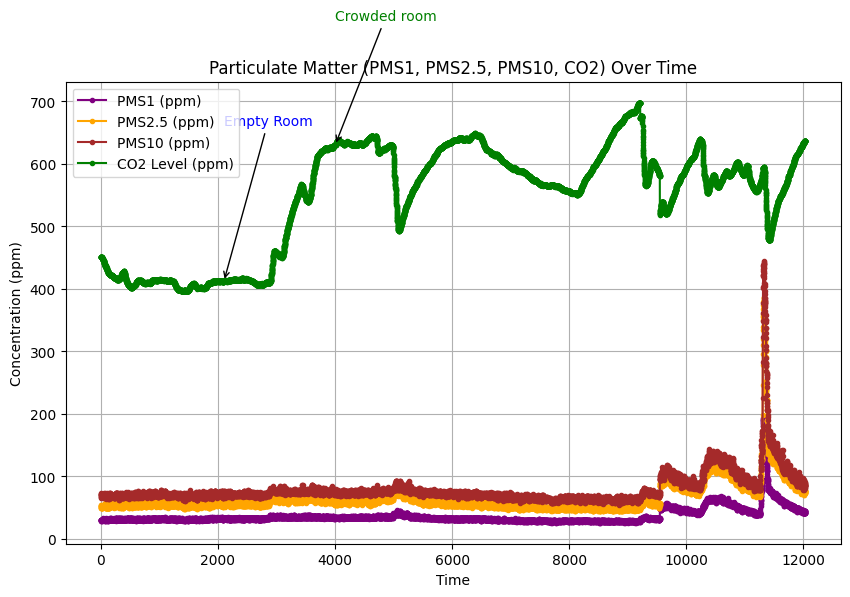

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Figs/Particulate Matter (PMS1, PMS2.5, PMS10, CO2) Over Time.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure for the plot
plt.figure(figsize=(10, 6))

# Plot PMS1, PMS2.5, and PMS10 vs. Time
plt.plot(df_final.index, df_final['Pollutant_PMS1'], label='PMS1 (ppm)', color='purple', marker='o',markersize=3)
plt.plot(df_final.index, df_final['Pollutant_PMS2_5'], label='PMS2.5 (ppm)', color='orange', marker='o',markersize=3)
plt.plot(df_final.index, df_final['Pollutant_PMS10'], label='PMS10 (ppm)', color='brown', marker='o',markersize=3)
plt.plot(df_final.index, df_final['Pollutant_CO2'], label='CO2 Level (ppm)', color='green', marker='o',markersize=3)

# Add annotation at the 2100th data point for "Empty Room"
x_2100 = df_final.index[2100]  # 2100th point on x-axis
y_2100 = df_final['Pollutant_CO2'].iloc[2100]  # CO2 level at 2100th point

plt.annotate(
    'Empty Room',  # Text for the annotation
    xy=(x_2100, y_2100),  # Coordinates for the annotation
    xytext=(x_2100, y_2100 + 250),  # Position of the text slightly above the point
    arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow pointing to the point
    fontsize=10,
    color='blue'
)


x_4000 = df_final.index[4000]  # 4000th point on x-axis
y_4000 = df_final['Pollutant_CO2'].iloc[4000]  # CO2 level at 4000th point

plt.annotate(
    f'Crowded room',  # Text for the annotation
    xy=(x_4000, y_4000),  # Coordinates for the annotation
    xytext=(x_4000, y_4000 + 200),  # Position of the text slightly above the point
    arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow pointing to the point
    fontsize=10,
    color='green'
)

# Setting titles and labels
plt.title('Particulate Matter (PMS1, PMS2.5, PMS10, CO2) Over Time')
plt.xlabel('Time')
plt.ylabel('Concentration (ppm)')
plt.legend()
plt.grid()

# Display the plot
plt.show()
plt.savefig('/content/drive/My Drive/Figs/Particulate Matter (PMS1, PMS2.5, PMS10, CO2) Over Time.png')

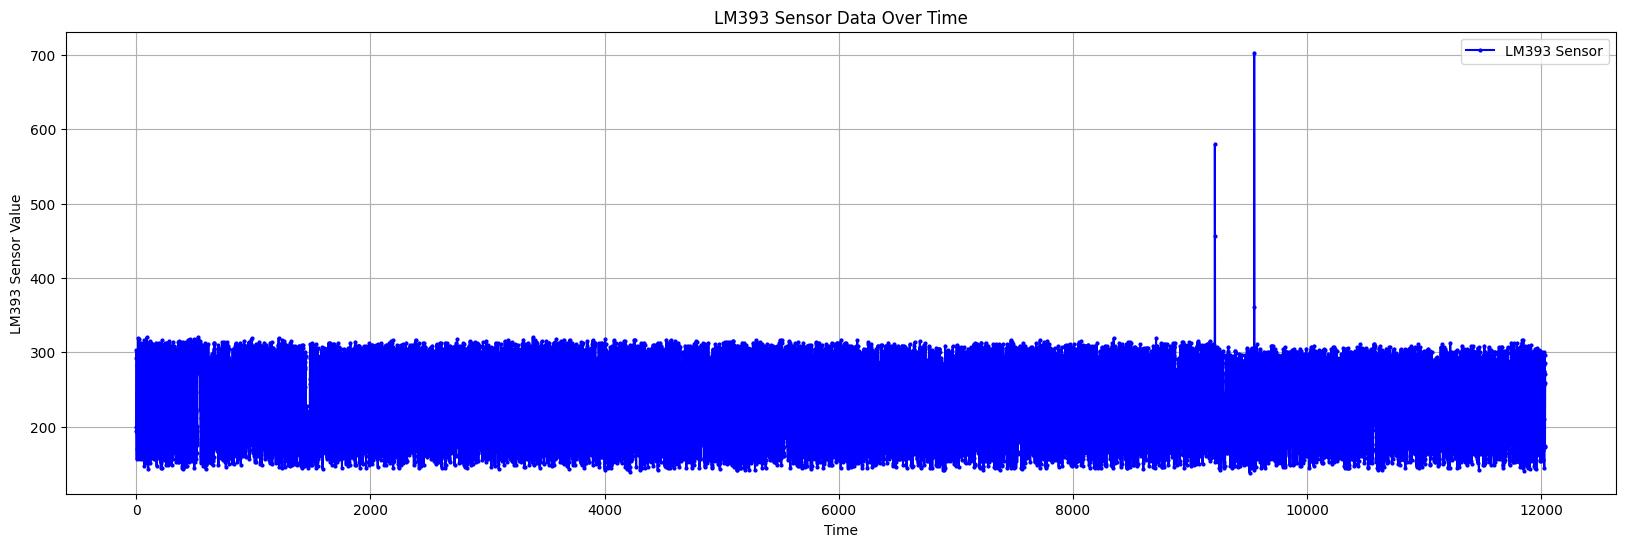

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Figs/LM393 Sensor Data Over Time.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure for the plot
plt.figure(figsize=(20, 6))

# Plot LM393 vs. Time
plt.plot(df_final.index, df_final['LM393_LM393'], label='LM393 Sensor', color='blue', marker='o', markersize = 2)

# Setting titles and labels
plt.title('LM393 Sensor Data Over Time')
plt.xlabel('Time')
plt.ylabel('LM393 Sensor Value')
plt.legend()
plt.grid()

# Display the plot
plt.show()
plt.savefig('/content/drive/My Drive/Figs/LM393 Sensor Data Over Time.png')

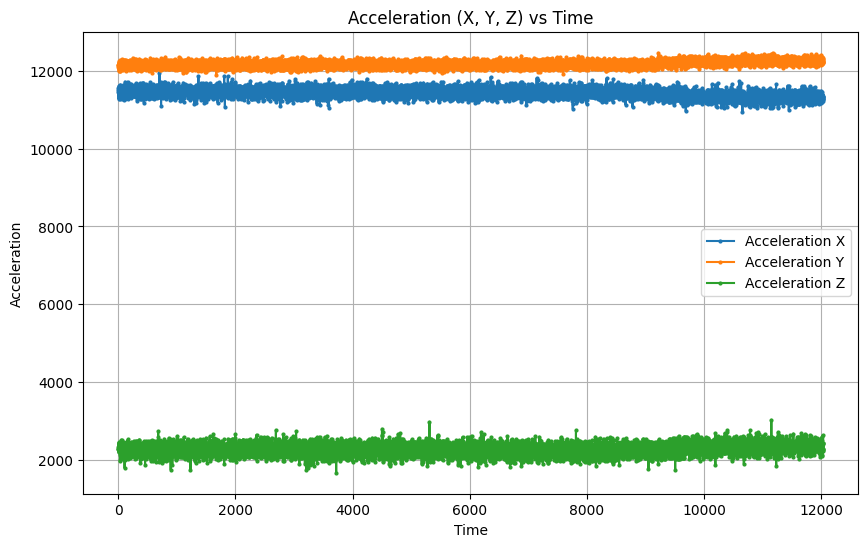

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Figs/Acceleration (X, Y, Z) vs Time.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot Acceleration in X, Y, and Z directions
plt.plot(df_final.index, df_final['MPU_Accel_X'], label='Acceleration X', marker='o', markersize=2)
plt.plot(df_final.index, df_final['MPU_Accel_Y'], label='Acceleration Y', marker='o', markersize=2)
plt.plot(df_final.index, df_final['MPU_Accel_Z'], label='Acceleration Z', marker='o', markersize=2)

# Titles and labels
plt.title('Acceleration (X, Y, Z) vs Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid()

# Display the plot
plt.show()
plt.savefig('/content/drive/My Drive/Figs/Acceleration (X, Y, Z) vs Time.png')

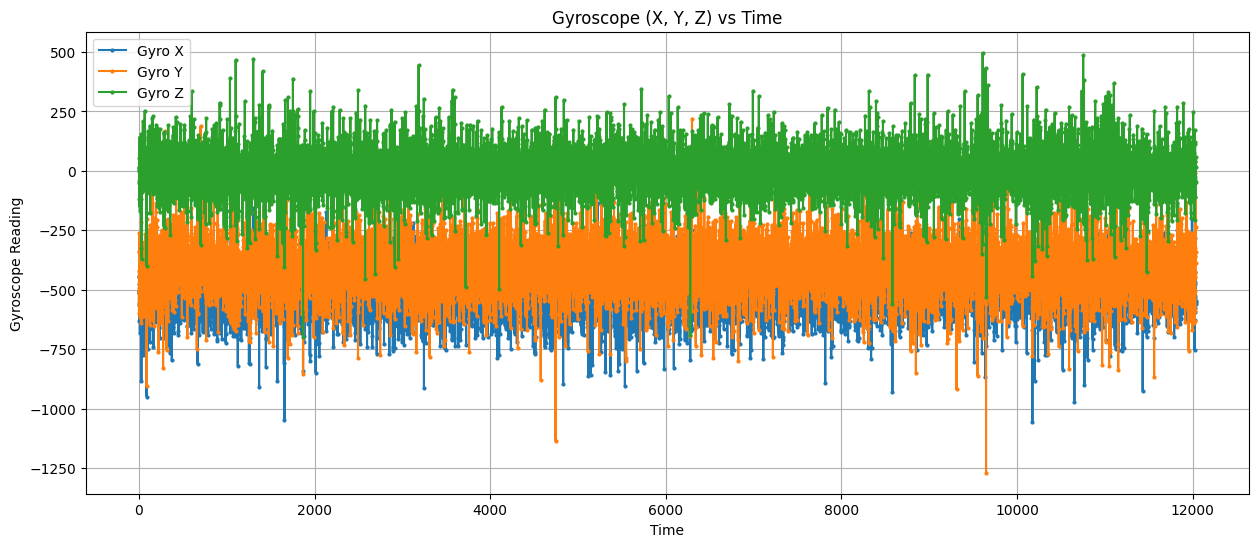

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Figs/Gyroscope (X, Y, Z) vs Time.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 6))

# Plot Gyroscope in X, Y, and Z directions
plt.plot(df_final.index, df_final['MPU_Gyro_X'], label='Gyro X', marker='o', markersize=2)
plt.plot(df_final.index, df_final['MPU_Gyro_Y'], label='Gyro Y', marker='o', markersize=2)
plt.plot(df_final.index, df_final['MPU_Gyro_Z'], label='Gyro Z', marker='o', markersize=2)

# Titles and labels
plt.title('Gyroscope (X, Y, Z) vs Time')
plt.xlabel('Time')
plt.ylabel('Gyroscope Reading')
plt.legend()
plt.grid()

# Display the plot
plt.show()
plt.savefig('/content/drive/My Drive/Figs/Gyroscope (X, Y, Z) vs Time.png')